In [73]:
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
font_name = "SimHei"
mpl.rcParams['font.family']=font_name
mpl.rcParams['axes.unicode_minus']=False # in case minus sign is shown as box

TT = 40_0000
def getXY(name:str, T=-1):
    if T == -1:
        T = TT
    with open(name, 'r',encoding="utf-8") as file:
        lines = file.readlines()
    ts = []
    fs = []
    for i in range(len(lines)):
        sentence = lines[i]
        if i % 2 == 0:
            if int(float(sentence.split()[0])) > T:
                continue
            ts.append(int(float(sentence.split()[0])))
        else:
            fs.append(float(sentence.split()[0].strip("[")))  # '[70.47        2.95153658]'
    x_num = -6
    for i in range(0, len(ts)):
        if ts[i] > ts[i+1]:
            x_num = i + 1  # +1是因为数组从零开始
            break

    X = np.array(ts[:x_num])
    Y = np.zeros(len(X))
    times = 0
    for i in range((len(fs)//x_num) * x_num):
        if i % x_num == 0:
            times += 1
        Y[i % x_num] += fs[i]
    Y /= times
    # print(Y[-1])
    return X, Y

In [74]:
def getFinalInfo(name:str, T=-1):
    if T == -1:
        T = TT
    with open(name, 'r',encoding="utf-8") as file:
        lines = file.readlines()
    ts = []
    fs = []
    for i in range(len(lines)):
        sentence = lines[i]
        if i % 2 == 0:
            if int(float(sentence.split()[0])) > T:
                continue
            ts.append(int(float(sentence.split()[0])))
        else:
            fs.append(float(sentence.split()[0].strip("[")))  # '[70.47        2.95153658]'
    x_num = -6 # !! 每次运行的打印次数 !!
    for i in range(0, len(ts)):
        if ts[i] > ts[i+1]:
            x_num = i + 1  # +1是因为数组从零开始
            break
    finals = []
    for i in range((len(fs)//x_num) * x_num):
        if (i + 1) % x_num == 0:  # 每次运行的最后一行打印
            finals.append(fs[i])
    print(finals)
    return finals


In [75]:
colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple', 'black', 'grey']
file_colors = dict()
ci = 0
for file_name in os.listdir('D:/42/Final/Code_Project/EA_submodular/Z画图/'
                            'MC-0/degree'):
    if file_name == '0画.ipynb': continue
    file_colors[file_name] = colors[ci]
    ci += 1
print(file_colors)


{'final.py_result.txt': 'red', 'kzt_MC_EAMC.txt': 'orange', 'MC_Jiao回档并修改_算法等同WrongHamm.py_result.txt': 'yellow', 'MC_Jiao非支配排序.py_result.txt': 'green', 'varyHam_finallllllll.py_result.txt': 'cyan', '消融-无ham-outdegree怎么跑了120万.py_result.txt': 'blue'}


[421.0, 414.0, 420.0, 420.0, 418.0, 411.0, 421.0, 413.0, 422.0, 421.0, 419.0, 416.0, 417.0, 416.0, 414.0, 413.0, 411.0, 417.0, 415.0, 421.0]
[408.0, 411.0, 409.0, 416.0, 415.0, 407.0, 410.0, 417.0, 411.0, 406.0]
[424.0, 416.0, 422.0, 419.0, 423.0, 418.0, 421.0, 423.0, 424.0, 421.0]
[423.0, 419.0, 415.0, 418.0, 425.0, 415.0, 421.0, 414.0, 421.0, 419.0]
[419.0, 414.0, 422.0, 413.0, 409.0, 421.0, 415.0, 412.0, 420.0, 418.0]
[423.0, 423.0, 423.0, 416.0, 419.0, 419.0, 418.0, 419.0, 419.0, 424.0, 424.0, 424.0, 425.0, 425.0, 425.0, 423.0, 423.0, 423.0, 419.0, 421.0, 423.0, 417.0, 424.0, 424.0, 421.0, 421.0, 421.0, 414.0, 417.0, 417.0]
final.py 417.0 +- 3.5540932665545544
kzt_MC_EAMC 411.0 +- 3.8297084310253524
MC_Jiao回档并修改_算法等同WrongHamm.py 421.1 +- 2.685351208149711
MC_Jiao非支配排序.py 419.0 +- 3.6209268304000717
varyHam_finallllllll.py 416.3 +- 4.321779468896785
消融-无ham-outdegree怎么跑了120万.py 421.1333333333333 +- 3.0595619850282305


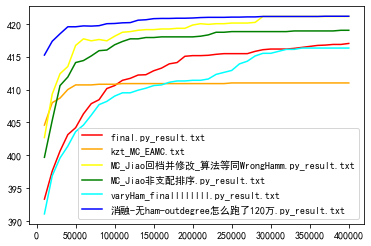

In [76]:
infos = dict()
for fi in file_colors:
    color = file_colors[fi]
    X, Y = getXY(fi)
    plt.plot(X, Y, color, label=fi)
    infos[fi] = getFinalInfo(fi)
for fi in infos:
    print(fi.strip('_result.txt'), np.mean(infos[fi]), '+-', np.std(infos[fi], ddof=1))

# print(Infos)
plt.legend()
plt.show()